# Prediction Using Decision Tree Algorithm

# GRIP Internship Program

# Task no: #6

# Assigned by: The Sparks Foundation


# Done by: Sai Ruthvik Reddy Mitta

# Task Objective: 
Create a Decision Tree Classifier and visualize it graphically and if new data is feeded to this classifier, it would be able to predict the right class accordingly.

# Decision Trees:
   A decision tree is a supervised learning algorithm that is used for classification and regression modeling. Regression is a method used for predictive modeling, so these trees are used to either classify data or predict what will come next. 

Decision trees look like flowcharts, starting at the root node with a specific question of data, that leads to branches that hold potential answers. The branches then lead to decision (internal) nodes, which ask more questions that lead to more outcomes. This goes on until the data reaches what’s called a terminal (or “leaf”) node and ends.

In machine learning, there are four main methods of training algorithms: supervised, unsupervised, reinforcement learning, and semi-supervised learning. A decision tree helps us visualize how a supervised learning algorithm leads to specific outcomes.

# Types of decision trees in machine learning
Decision trees in machine learning can either be classification trees or regression trees. Together, both types of algorithms fall into a category of “classification and regression trees” and are sometimes referred to as CART. Their respective roles are to “classify” and to “predict.”

1. Classification trees
Classification trees determine whether an event happened or didn’t happen. Usually, this involves a “yes” or “no” outcome. 
2. Regression trees
Regression trees, on the other hand, predict continuous values based on previous data or information sources.

#  1 Importing Requried Libraries

In [1]:
import pandas as pd
import numpy as np

# 2 Loading the Data

We'll be loading the Iris Dataset using Pandas library
We'll be using the Iris Dataset


In [2]:
# we create an instance df of read_csv method for reading the csv file
df = pd.read_csv('/Users/user/Downloads/Iris.csv') # reading the csv file. we enter the directory where our file is located
df.head(10) # In general .head() returns the first 5 rows, here we are specifying to fetch the first 10 rows


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# 3 Check for missing values
  Sometimes the data can have missing values like white spaces and NaN (Not a Number). So, before proceeding further it is a good idea to check for those values

In [3]:
# Check for the existence of NaN values in a cell:
df.isnull().sum() # we are checking if there are any null values using isnull() function and taking the sum of all those values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

It's clear that our Dataset doesn't have any null values and we can move ahead!!

TAKE A QUICK LOOK AT THE SPECIES COLUMN

In [4]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

# 4 Feature Selection
  We divide the given columns into two type of variables. Dependent(Target) Variables and Independent(Feature) Variables

In [5]:
Feature_columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
Target_columns = ['Species']
X = df[Feature_columns].values # Features
print('The values of Feature Columns are :\n',X)
y = df.Species    # Target
print('The values of Target Variable is:\n',y)

The values of Feature Columns are :
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7

In [6]:
len(X)

150

# 5 Split the Data into Train & Test sets:

In [7]:
""" Generally we split data for traning our model and testing it.For this purpose we SciKit-Learn which is a popular 
    Machine Learning Library for Python Programming language """

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
# we split the data into those following variables and here we're taking test size as 25% for our input data size.
# This function splits the data randomly and we're providing random_state as 1 because if someone also want to get the same split as us.




C:\Users\user\anaconda3\envs\nlp_course\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


# 6 Building the Decision Tree Classifier

In [9]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
# creating instance of DecisionTreeClassifier
dtc=DecisionTreeClassifier()
# we fit the data into the model so it'll learn from it.
dtc.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


C:\Users\user\anaconda3\envs\nlp_course\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


PREDICTING THE VALUES FOR OUR TEST SET

In [10]:
predictions = dtc.predict(X_test)

# 7 Evaluating the model

In [11]:
from sklearn.metrics import accuracy_score,classification_report


In [12]:
# Print the overall accuracy
print(accuracy_score(y_test,predictions))

0.9736842105263158


It's great that just by using around 5 lines of code we got an accuracy of about 97.4%
But Accuracy is not always the best metric to evaluate a model

In [13]:
# Print a classification report
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

      micro avg       0.97      0.97      0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



f1-score is the metric which we want and our model has done very well as the f1-score suggests

# 8 visualize the Model

In [49]:
# Install required libraries
!pip install pydotplus


In [57]:
!pip install graphviz 

In [20]:
import os
os.environ["PATH"] += os.pathsep + r"C:\Users\user\anaconda3\envs\nlp_course\Lib\site-packages\graphviz\bin"



In [21]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

Visualize the Graph

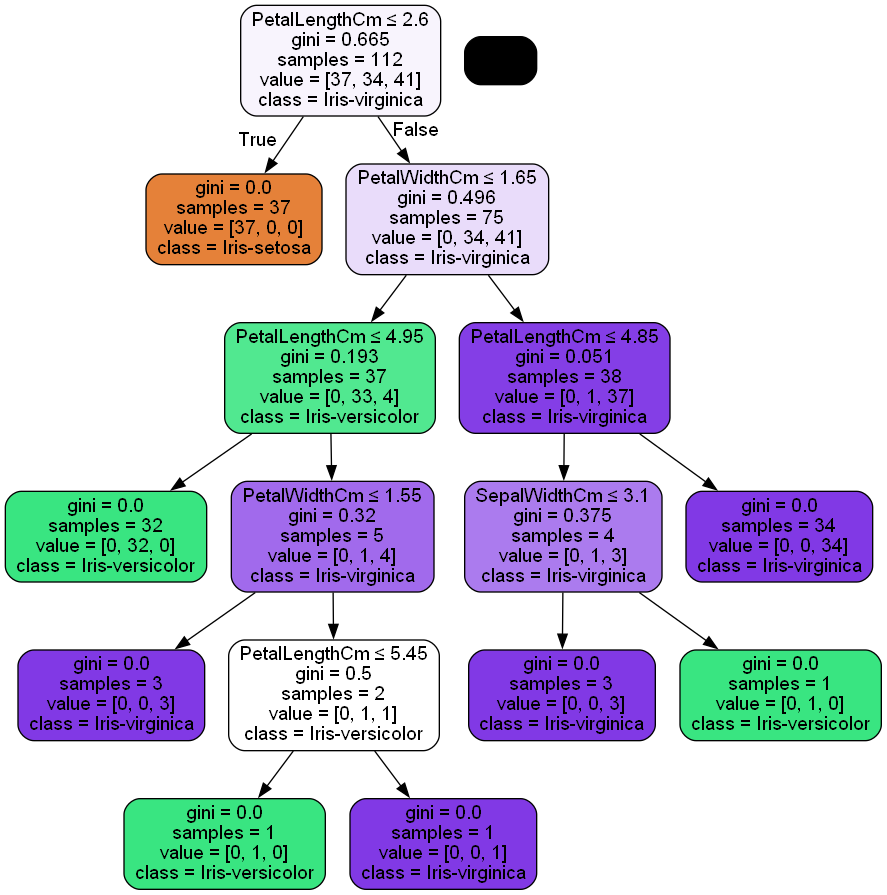

In [22]:
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, feature_names=Feature_columns,  
                filled=True, rounded=True,
                special_characters=True,
               class_names = np.unique(y))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('iris.png')
Image(graph.create_png())

# 9 Testing on New Data

In [25]:
new_data = [7.0, 5.7 ,3.9, 2.1]
new_predict = dtc.predict([new_data])

In [26]:
new_predict

array(['Iris-versicolor'], dtype=object)

So, our model can predict even some new data too!!

# THANK YOU